## Data Files

We have two data files:

- uci_credit_drifted_historic.csv: This file represent the historical data. Is the data available at the moment of training the model
- uci_credit_drifted_inference.csv: This file represents the data that we receive after training the moment. Is the data that we want to make the predictions

## UCI Credit Dataset

We will use the default credit card Dataset from the UCI machine learning repository. The dataset was used in [[1]](#[1]). 

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients. The goal will be predict if a customer will default on a credit

The next columns are available in the dataset:


- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no). This is the Target variable

Besides that, we also created a few columns:

- WARNING_SENT: Variable indicating for those customer that had credit default they received a special warning before
- time: time when we get the customer information. I could indicate the month of the year for example
- id: Id of the customer



In [ ]:
import pandas as pd

In [4]:
df = pd.read_csv("data/uci_credit_drifted_historic.csv")

In [7]:
df.to_csv("data/uci_credit_drifted_historic.csv", index=False)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,WARNING_SENT,time,id
0,50000.0,1,2,1,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,4
1,500000.0,1,1,2,29,0,0,0,0,0,...,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,0,1,6
2,100000.0,2,2,2,23,0,-1,-1,0,0,...,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,1,7
3,260000.0,2,1,2,51,-1,-1,-1,-1,-1,...,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0,0,1,11
4,630000.0,2,2,2,41,-1,0,-1,-1,-1,...,1000.0,6500.0,6500.0,6500.0,2870.0,0.0,0,0,1,12


### Target is unbalanced

In [9]:
df["default.payment.next.month"].value_counts()

0    9607
1    1593
Name: default.payment.next.month, dtype: int64

### Customers with payment delay in previous month increases over time in the inference data

NOTE: we show here for the illustration of the problem setup, but we wouldn't have the inference data before training the model. 

In [17]:
df_inference = pd.read_csv("data/uci_credit_drifted_inference.csv")

In [18]:
df_inference["DELAY_LAST_MONTH"] = df_inference["PAY_0"].apply(lambda x: True if x > 0 else False)

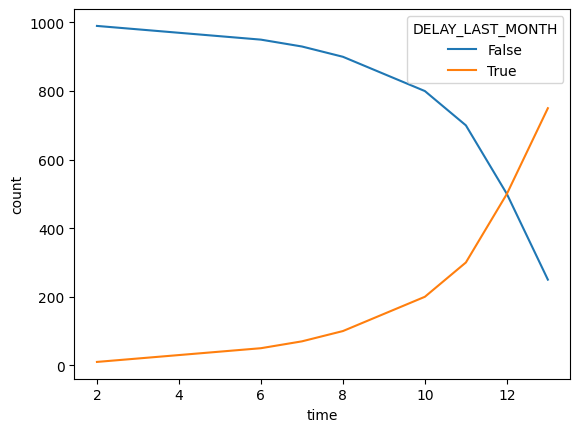

In [19]:
import seaborn as sns
sample_counts = df_inference[df_inference["time"] >= 1].groupby(["time", "DELAY_LAST_MONTH"])["id"].count().to_frame().reset_index()
sample_counts = sample_counts.rename(columns={"id": "count"})
sample_counts = sample_counts[sample_counts["time"] > 1]
ax = sns.lineplot(x="time", y="count", hue="DELAY_LAST_MONTH", data=sample_counts)

## References

<a id="[1]">[1]</a>
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480. https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients